#Import bitnih biblioteka


In [1]:
!pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from os import listdir
from os.path import isdir,join
import librosa 
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

#Pronalaženje data seta

In [3]:
DATASET_PATH = '/content/drive/MyDrive/numbers' #on my drive

In [4]:
folders = [name for name in listdir(DATASET_PATH) if isdir(join(DATASET_PATH,name))]
folders

['Sest',
 'Pet',
 'Cetiri',
 'Nula',
 'Sedam',
 'Tri',
 'Jedan',
 'Devet',
 'Dva',
 'Osam']

In [5]:
list_of_all = folders
feature_sets_file = 'all_mfcc_sets.npz'
perc_keep_samples = 1.0 #vrati se
val_ratio=0.1
test_ratio=0.1
sample_rate=16000 #8000
num_mfcc = 16
len_mfcc =16

Append svih records u jednu listu i stavljanje labele

In [6]:
filenames = []
y = []

for index,target in enumerate(list_of_all):
  filenames.append(listdir(join(DATASET_PATH,target)))
  y.append(np.ones(len(filenames[index]))*index)

  #print(join(DATASET_PATH,target))



Flatten

In [7]:
filenames = [item for sublist in filenames for item in sublist]
#flatten u jedan niz

In [8]:
y = [item for sublist in y for item in sublist]

In [9]:
len(filenames)

1000

#Split na train, validation i test podatke

In [10]:
filenames_y = list(zip(filenames,y))  #zip
random.shuffle(filenames_y)
filenames,y = zip(*filenames_y)


In [11]:
 val_set_size = int(len(filenames)*val_ratio)
 test_set_size = int(len(filenames)*test_ratio)

In [12]:
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size+test_set_size)]
filenames_train = filenames[(val_set_size+test_set_size):]

In [13]:
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size+test_set_size)]
y_orig_train = y[(val_set_size+test_set_size):]

#Uvođenje MFCC

In [14]:
def calc_mfcc(path):

  signal,fs = librosa.load(path,sr=sample_rate)

  signal = librosa.util.fix_length(signal, size=40000)    #padding

  mfccs = librosa.feature.mfcc(signal,n_mfcc=16,sr=fs)
  #mfccs = python_speech_features.base.mfcc(signal,samplerate=fs,winlen=0.256,winstep=0.050,numcep=num_mfcc,nfilt=26,nfft=4096,preemph=0.0,ceplifter=0,appendEnergy=False,winfunc=np.hanning)

  #return mfccs.transpose()
  return mfccs

Primjer prikaza audio zapisa

In [15]:
import IPython.display as ipd

audio_file = '/content/drive/MyDrive/Project_ml/Devet/N18_9.wav'
ipd.Audio(audio_file)

Prikaz MFCCS

In [16]:
import librosa.display

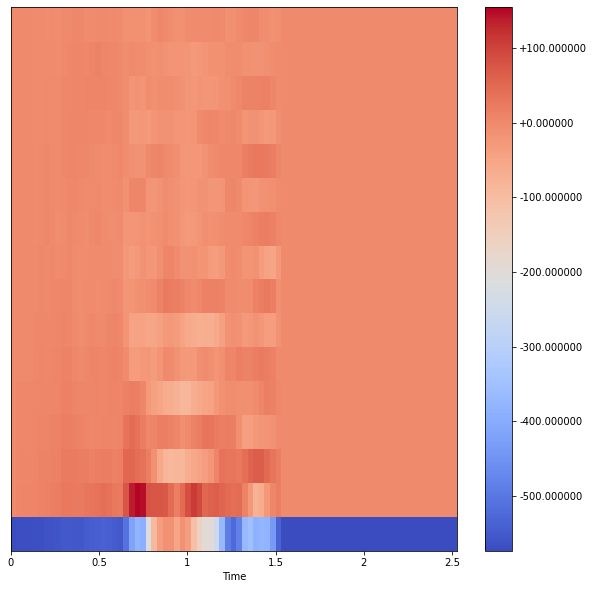

In [17]:
mfccs = calc_mfcc(audio_file)
signal,fs = librosa.load(audio_file,sr=sample_rate)

plt.figure(figsize=(10,10))
librosa.display.specshow(mfccs,x_axis='time',sr=fs)
plt.colorbar(format='%+2f')
plt.show()

In [18]:
def extract_features(in_files,in_y):
  out_x=[]
  out_y=[]

  for index,filename in enumerate(in_files):

    path=join(DATASET_PATH,list_of_all[int(in_y[index])],filename)

    mfccs=calc_mfcc(path)

    out_x.append(mfccs)
    out_y.append(in_y[index])

  return out_x,out_y

Primijena calc_mfcc na podatke

In [19]:
X_train,y_train = extract_features(filenames_train,y_orig_train) 
X_val,y_val = extract_features(filenames_val,y_orig_val)
X_test,y_test = extract_features(filenames_test,y_orig_test)

Saving features

In [20]:
np.savez(feature_sets_file,x_train=X_train,y_train=y_train,x_val=X_val,y_val=y_val,x_test=X_test,y_test=y_test)

In [21]:
feature_sets = np.load(feature_sets_file)
feature_sets.files   #mozemo vidjeti sve stored vrijednosti i prstupiti nizovima

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [22]:
print(feature_sets['y_val'])

[9. 8. 3. 0. 0. 9. 7. 9. 6. 3. 0. 3. 4. 0. 8. 6. 2. 6. 8. 8. 9. 9. 7. 1.
 1. 4. 0. 2. 9. 5. 0. 0. 2. 5. 9. 8. 7. 2. 4. 1. 8. 1. 7. 5. 1. 7. 7. 2.
 1. 8. 9. 7. 0. 9. 9. 1. 5. 3. 1. 4. 2. 2. 8. 8. 4. 6. 8. 9. 1. 1. 5. 5.
 9. 0. 5. 1. 8. 9. 6. 8. 6. 2. 8. 5. 7. 1. 4. 7. 6. 4. 0. 7. 6. 6. 2. 9.
 0. 5. 7. 6.]


In [23]:
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [24]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(800, 16, 79, 1)
(100, 16, 79, 1)
(100, 16, 79, 1)


In [25]:
sample_shape = x_test.shape[1:] #dimenzija of one sample
print(sample_shape)

(16, 79, 1)


#Pravljenje modela

In [26]:
from tensorflow.keras import layers, models

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Prikaz modela

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 78, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 39, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 38, 32)         4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 19, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 18, 64)         8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 9, 64)         0

Dodavanje trening parametara

In [29]:

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

Treniranje

In [30]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

8/8 [==============================] - 1s 97ms/step - loss: -14774479.0000 - acc: 0.0925 - val_loss: -19065216.0000 - val_acc: 0.1200
Epoch 12/30
8/8 [==============================] - 1s 94ms/step - loss: -20020184.0000 - acc: 0.0925 - val_loss: -25476934.0000 - val_acc: 0.1200
Epoch 13/30
8/8 [==============================] - 1s 95ms/step - loss: -26610698.0000 - acc: 0.0925 - val_loss: -33396324.0000 - val_acc: 0.1200
Epoch 14/30
8/8 [==============================] - 1s 97ms/step - loss: -34481032.0000 - acc: 0.0925 - val_loss: -42979752.0000 - val_acc: 0.1200
Epoch 15/30
8/8 [==============================] - 1s 96ms/step - loss: -45084852.0000 - acc: 0.0925 - val_loss: -54760632.0000 - val_acc: 0.1200
Epoch 16/30
8/8 [==============================] - 1s 95ms/step - loss: -56926480.0000 - acc: 0.0925 - val_loss: -68724104.0000 - val_acc: 0.1200
Epoch 17/30
8/8 [==============================] - 1s 94ms/step - loss: -71319728.0000 - acc: 0.0925 - val_loss: -85170832.0000 - val_ac